# Web Scrapping Project

In [27]:
pip install requests beautifulsoup4 pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# Step 1: Fetch Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [30]:
# Step 2: Find the table
table = soup.find("table", {"class": "wikitable"})

# Step 3: Extract headers
headers = [header.text.strip() for header in table.find_all("th")]

# Step 4: Extract rows
rows = []
for row in table.find_all("tr")[1:]:
    cells = [cell.text.strip() for cell in row.find_all(["td", "th"])]
    if cells:
        rows.append(cells)

In [31]:
# Step 5: Create a DataFrame
df = pd.DataFrame(rows, columns=headers)

# Cleaning column names and removing unwanted rows
df.columns = [col.strip() for col in df.columns]  # Strip spaces from column names
df = df.iloc[:, :4]  # Keep only relevant columns
df.columns = ["Rank", "Country", "Population", "Percentage"]

# Clean Population column: Remove commas and non-numeric characters
df["Population"] = (
    df["Population"]
    .str.replace(",", "", regex=False)  # Remove commas
    .str.replace(r"[^\d.]", "", regex=True)  # Remove non-numeric characters
)
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")  # Convert to float

# Clean Percentage column: Remove % and non-numeric characters
df["Percentage"] = (
    df["Percentage"]
    .str.replace("%", "", regex=False)  # Remove percentage sign
    .str.replace(r"[^\d.]", "", regex=True)  # Remove non-numeric characters
)
df["Percentage"] = pd.to_numeric(df["Percentage"], errors="coerce")  # Convert to float

# Drop rows with missing values in critical columns
df.dropna(subset=["Population", "Percentage"], inplace=True)

# Remove the first row (World data)
df = df.iloc[1:].reset_index(drop=True)


In [32]:
# Step 6: Perform EDA
print("First 5 rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())
print("\nData types:")
print(df.info())

First 5 rows of the dataset:
       Rank        Country    Population  Percentage
0  1/2  [b]          China  1.409670e+09        17.3
1     India  1,404,910,000  1.720000e+01     12024.0
2         3  United States  3.358932e+08         4.1
3         4      Indonesia  2.824776e+08         3.5
4         5       Pakistan  2.414994e+08         3.0

Summary statistics:
         Population    Percentage
count  2.390000e+02    239.000000
mean   2.736196e+07     50.641923
std    1.003401e+08    777.747294
min    1.720000e+01      0.000000
25%    3.411735e+05      0.004500
50%    5.421272e+06      0.070000
75%    2.109328e+07      0.300000
max    1.409670e+09  12024.000000

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        239 non-null    object 
 1   Country     239 non-null    object 
 2   Population  239 non-null    float64
 3  

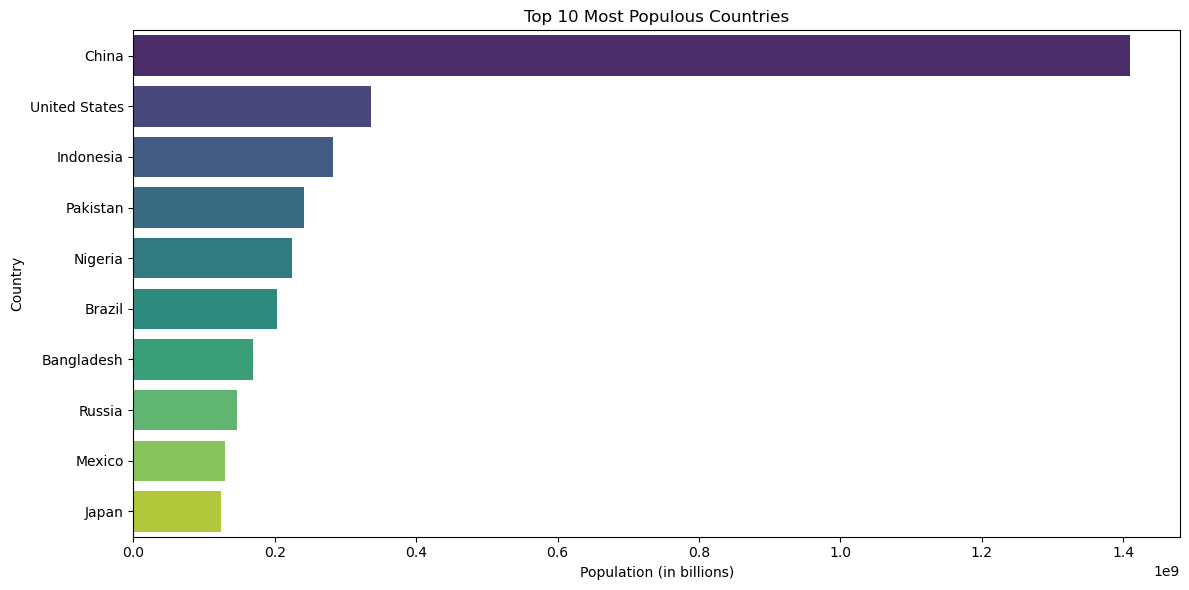

In [33]:
# Step 7: Visualization
# Bar chart for the top 10 populous countries
top_10 = df.nlargest(10, "Population")

plt.figure(figsize=(12, 6))
sns.barplot(x="Population", y="Country", data=top_10, palette="viridis")
plt.xlabel("Population (in billions)")
plt.ylabel("Country")
plt.title("Top 10 Most Populous Countries")
plt.tight_layout()
plt.show()


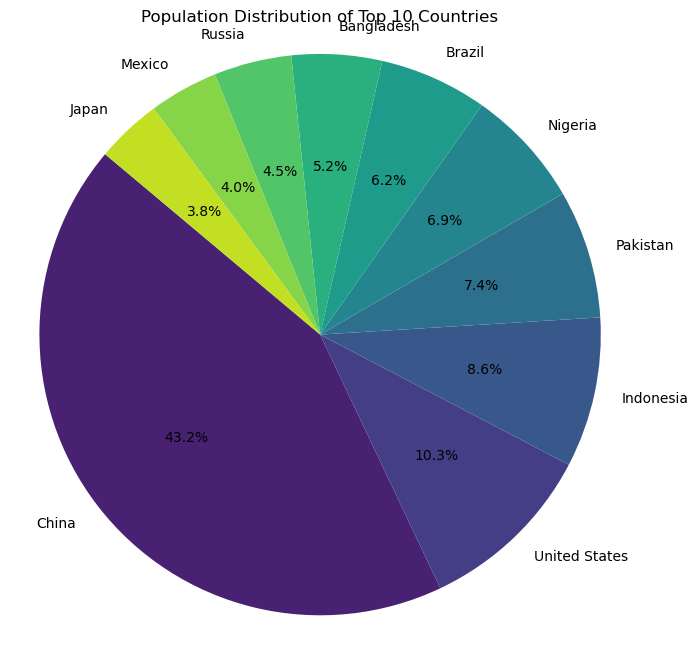

In [34]:
# Pie chart of population percentages for the top 10 populous countries
plt.figure(figsize=(8, 8))
plt.pie(
    top_10["Population"],
    labels=top_10["Country"],
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("viridis", len(top_10)),
)
plt.title("Population Distribution of Top 10 Countries")
plt.axis("equal")
plt.show()


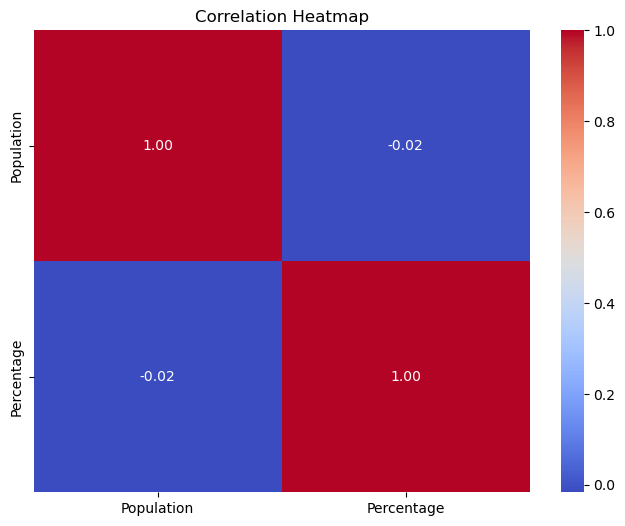

In [36]:
# Heatmap for correlation
correlation = df[["Population", "Percentage"]].corr()  # Only numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()